<a href="https://colab.research.google.com/github/KKhushhalR2405/Gender-Flask/blob/master/eigen_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL 


In [ ]:
cd /content/drive/MyDrive/gender_flask

/content/drive/MyDrive/gender_flask


In [ ]:
!ls

dataset


In [ ]:
data = np.load("/content/drive/MyDrive/gender_flask/dataset/dataframe_norm.npz")

In [ ]:
x = data["arr_0"]
y=data["arr_1"]

In [ ]:
x.shape , y.shape

((8889, 10000), (8889,))

In [ ]:
x1=x-x.mean(axis=0)

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=None,whiten=True,svd_solver="auto")

In [ ]:
x_pca = pca.fit_transform(x1)

In [ ]:
 x_pca.shape
 

(8889, 8889)

In [ ]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

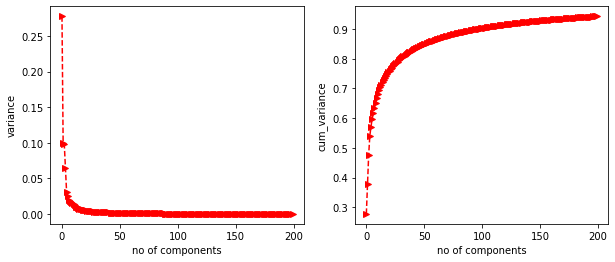

In [ ]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.xlabel("no of components")
plt.ylabel("variance")
plt.plot(eigen_ratio[:200],"r>--")
plt.subplot(1,2,2)
plt.xlabel("no of components")
plt.ylabel("cum_variance")
plt.plot(eigen_ratio_cum[:200],"r>--")
plt.show()

Considering 50 components to get 80% variance.

In [ ]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver="auto")
x_pca_50 = pca_50.fit_transform(x1)

In [ ]:
import pickle


In [ ]:
pickle.dump(pca_50,open("./dataset/pca50.pickle","wb"))

In [ ]:
#now using eigen images

In [ ]:
x_pca_inverse = pca_50.inverse_transform(x_pca_50)

In [ ]:
x_pca_inverse.shape

(8889, 10000)

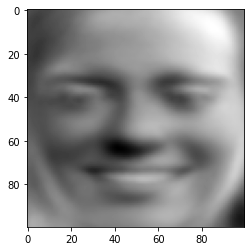

In [ ]:
eigen_image = x_pca_inverse[0,:]
eigen_image = eigen_image.reshape(100,100)
plt.imshow(eigen_image,cmap="gray")

In [ ]:
maindata = pd.read_pickle("/content/drive/MyDrive/gender_flask/dataset/image_dataframe.pkl", compression='infer')

In [ ]:
pic = maindata[0]

,gender,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,male,13,12,11,10,10,9,8,6,3,3,2,1,2,3,4,4,5,9,13,24,41,56,64,75,83,88,91,96,103,110,116,118,121,124,127,128,130,133,136,...,142,135,128,125,126,126,123,118,113,103,92,89,90,91,89,84,78,79,80,85,97,117,139,144,124,78,25,12,11,7,6,8,1,3,2,1,0,0,0,0
1,male,36,31,28,29,26,22,27,30,27,30,35,41,49,57,62,67,79,87,93,98,103,111,117,117,121,127,133,135,136,138,142,148,152,152,149,147,146,145,146,...,168,164,163,164,162,157,154,155,156,153,153,151,143,132,120,113,113,115,126,135,139,136,129,127,130,128,122,120,115,112,113,110,100,106,99,73,54,52,47,40
2,male,16,16,16,16,15,15,18,21,23,22,24,28,28,27,26,26,26,27,32,43,46,52,61,71,79,82,90,95,97,94,87,84,88,95,97,89,90,95,97,...,81,74,72,72,70,66,67,61,56,58,55,54,53,52,50,48,53,60,59,46,35,27,29,34,40,40,33,28,29,36,30,33,41,50,53,45,45,50,62,78
3,male,158,151,152,155,155,153,162,161,160,169,204,232,237,236,236,238,240,237,237,238,238,240,240,240,240,241,242,241,239,237,237,238,239,238,238,238,239,241,244,...,157,146,138,127,121,112,102,94,94,96,105,114,125,144,147,155,166,176,180,185,191,194,194,194,196,197,198,200,203,208,206,208,212,215,213,214,218,218,213,206
4,male,138,138,141,144,144,144,143,137,132,129,131,129,127,128,130,134,141,146,150,153,155,154,152,151,152,152,153,153,153,154,154,154,154,156,157,158,158,158,158,...,157,159,161,161,157,148,141,142,143,140,131,116,98,97,112,126,126,111,92,91,86,79,74,63,60,65,73,76,62,10,11,21,25,18,8,4,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,female,103,100,105,117,130,138,123,106,105,115,123,122,123,122,112,106,120,156,173,174,176,180,174,147,130,148,162,164,161,173,174,172,174,177,176,175,173,175,175,...,164,159,151,144,143,140,132,124,113,97,82,78,89,101,114,129,137,137,128,120,118,119,113,98,92,100,110,113,123,133,137,134,130,138,159,166,162,154,143,124
9399,female,123,116,118,111,101,97,101,107,102,86,70,68,74,81,84,90,98,105,121,129,123,124,122,114,111,117,115,116,130,140,148,148,142,138,141,153,153,137,150,...,188,186,185,185,185,184,183,181,179,177,172,169,164,159,151,146,143,139,135,131,128,125,127,126,123,120,119,118,116,113,105,102,90,92,100,101,96,87,78,82
9400,female,3,17,29,21,25,26,29,53,50,62,32,37,38,52,54,49,48,41,28,36,31,61,90,96,98,98,86,68,72,74,90,97,98,94,99,110,115,108,110,...,139,136,137,132,129,128,124,116,109,99,84,66,39,31,33,35,38,49,73,94,116,196,196,179,149,151,181,184,167,165,135,140,139,130,147,160,168,197,215,234
9401,female,166,168,179,191,195,187,173,165,173,190,202,205,201,192,183,181,186,190,191,191,183,175,168,163,160,158,155,150,148,145,139,132,123,112,108,119,121,125,131,...,168,163,156,149,144,139,137,135,134,130,120,114,105,97,89,80,74,72,75,93,105,110,109,104,96,86,83,77,67,65,78,98,113,104,81,61,53,62,89,119


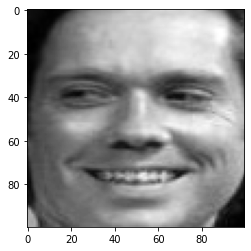

In [ ]:
pic = maindata.iloc[0][1:].astype("int").values.reshape(100,100)

plt.imshow(pic,cmap="gray")


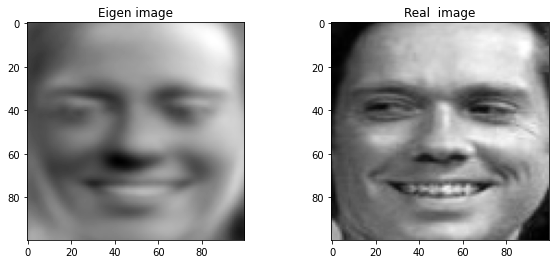

In [ ]:
eigen_image = x_pca_inverse[0,:]
eigen_image = eigen_image.reshape(100,100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Eigen image")
plt.imshow(eigen_image,cmap="gray")

pic = maindata.iloc[0][1:].astype("int").values.reshape(100,100)

plt.subplot(1,2,2)
plt.title("Real  image")
plt.imshow(pic,cmap="gray")

plt.show()


In [ ]:
#saving the data

In [ ]:
np.savez("./dataset/data_pca50_y_mean.pickle",x_pca_50,y,x.mean())